In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Importing all the libraries required for this analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

#Importing train_test_split 
from sklearn.model_selection import train_test_split

# Importing StandardScaler 
from sklearn.preprocessing import StandardScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing statsmodel
import statsmodels.api as sm 

# Importing VIF for calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing r2_score for calculation
from sklearn.metrics import r2_score 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Step 1. Reading and Understanding Data 

In [2]:
data=pd.read_csv('bank-additional-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.shape

(41188, 21)

#### The column y stands for subscription done or not hence rename that column to 'subscription'

In [6]:
data=data.rename(columns={'y':'subscription'})

#### Checking Null values in the required dataset

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscription      0
dtype: int64

#### Checking Data types of columns

In [8]:
data.select_dtypes(include='number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')

In [9]:
data.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscription'], dtype='object')

#### Checking unique data in all columns

In [10]:
data.apply(pd.Series.nunique, axis = 0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
subscription         2
dtype: int64

In [11]:
def uniqueDataView(data,col):
    count=0
    res_dct = {col[i]: data[col[i]].unique() for i in range(len(col))}
    for key in res_dct:
        count=count+1
        print(count, ".",key, ' : ', list(res_dct[key]))
        print()

In [12]:
uniqueDataView(data,list(data.columns.difference(['euribor3m','age','duration'])))

1 . campaign  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 18, 23, 14, 22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31, 30, 41, 37, 40, 33, 34, 43]

2 . cons.conf.idx  :  [-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45.9, -50.0, -47.1, -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33.0, -34.8, -34.6, -40.0, -39.8, -40.3, -38.3, -37.5, -49.5, -50.8]

3 . cons.price.idx  :  [93.994, 94.465, 93.91799999999999, 93.444, 93.79799999999999, 93.2, 92.756, 92.84299999999999, 93.075, 92.89299999999999, 92.963, 92.469, 92.20100000000001, 92.37899999999999, 92.431, 92.649, 92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199, 94.601, 94.76700000000001]

4 . contact  :  ['telephone', 'cellular']

5 . day_of_week  :  ['mon', 'tue', 'wed', 'thu', 'fri']

6 . default  :  ['no', 'unknown', 'yes']

7 . education  :  ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']

8 . emp.var.rate  :  [1.1,

#### Observation:
        1. There is no column having value as Nan/Null.
        2. Following columns are object type column that means these are going to be consider for categorical data analysis.
               'job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y','pday'
        3. The column default,education,housing,job,marital ,loan should contain data as 'unknown'.
        4. The pdays column contains data as 999 which is invalid.

#### Checking the data category in the all object type columns

In [13]:
round((data.isin([999]).sum()/data.shape[0])*100,2)

age                0.00
job                0.00
marital            0.00
education          0.00
default            0.00
housing            0.00
loan               0.00
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays             96.32
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
subscription       0.00
dtype: float64

    The column pday have 96% data in '999' hence removing the column from analysis

## Step 2: Data Cleaning

In [14]:
data=data.drop('pdays',axis=1)

In [15]:
round((data.isin(['unknown']).sum()/data.shape[0])*100,2)

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.87
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
subscription       0.00
dtype: float64

#### Handing invalid values

In [16]:
def removeInvalidValues(dataset,invalidValue):
    for val in invalidValue:
        for y in dataset.columns:
            dataset.loc[:,y]=dataset.loc[:,y].drop(dataset[dataset[y]==val].index)
    return (round((data.isin(invalidValue).sum()/data.shape[0])*100,2))

In [17]:
removeInvalidValues(data,['unknown'])

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
subscription      0.0
dtype: float64

#### Checking values in each categorical columns

In [18]:
def dataView(data,col):
    count=0
    res = {col[i]: round(data[col[i]].value_counts(normalize=True),3).to_frame()for i in range(len(col))}
    for k,v in res.items():
        count=count+1
        print('\n--------------------------------------------------------------\n',count,'.',v)

In [19]:
dataView(data,list(data.columns.difference(['euribor3m','age','duration'])))


--------------------------------------------------------------
 1 .     campaign
1      0.428
2      0.257
3      0.130
4      0.064
5      0.039
6      0.024
7      0.015
8      0.010
9      0.007
10     0.005
11     0.004
12     0.003
13     0.002
14     0.002
17     0.001
15     0.001
16     0.001
18     0.001
20     0.001
19     0.001
21     0.001
22     0.000
23     0.000
24     0.000
27     0.000
29     0.000
25     0.000
26     0.000
28     0.000
30     0.000
31     0.000
35     0.000
33     0.000
32     0.000
34     0.000
40     0.000
42     0.000
43     0.000
37     0.000
39     0.000
41     0.000
56     0.000

--------------------------------------------------------------
 2 .        cons.conf.idx
-36.4          0.188
-42.7          0.162
-46.2          0.141
-36.1          0.126
-41.8          0.106
-42.0          0.088
-47.1          0.060
-31.4          0.019
-40.8          0.017
-26.9          0.011
-30.1          0.009
-40.3          0.008
-37.5          0.007
-50.0    

#### Handling the missing/unknown data

#### Impute categorical data with mode and numerical data with mean

#### Observation
* Following columns are containing unknown or impute value in it which ideally NAN values.
       'job', 'marital', 'education', 'default', 'housing', 'loan','poutcome'
*  We need to fill these value with Nan then fill these with mode

In [20]:
data.fillna(data.select_dtypes(include='number').median(), inplace=True)
data.fillna(data.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [21]:
(100*data.isnull().sum()/len(data)).round(2)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
subscription      0.0
dtype: float64

## Step 3: Data Visualization

In [22]:
def categorical_analysis(cat_var,data):
    plt.figure(figsize=(16,25))
    for i in range(0,len(cat_var)):
        plt.subplot(6,2,i+1)
        ax=sns.countplot(y = cat_var[i], data = data,orient='v',palette='RdYlGn')
        plt.xticks(rotation=15)
        for rect in ax.patches:
            width = rect.get_width()
            plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='center', va='center')
    plt.show()

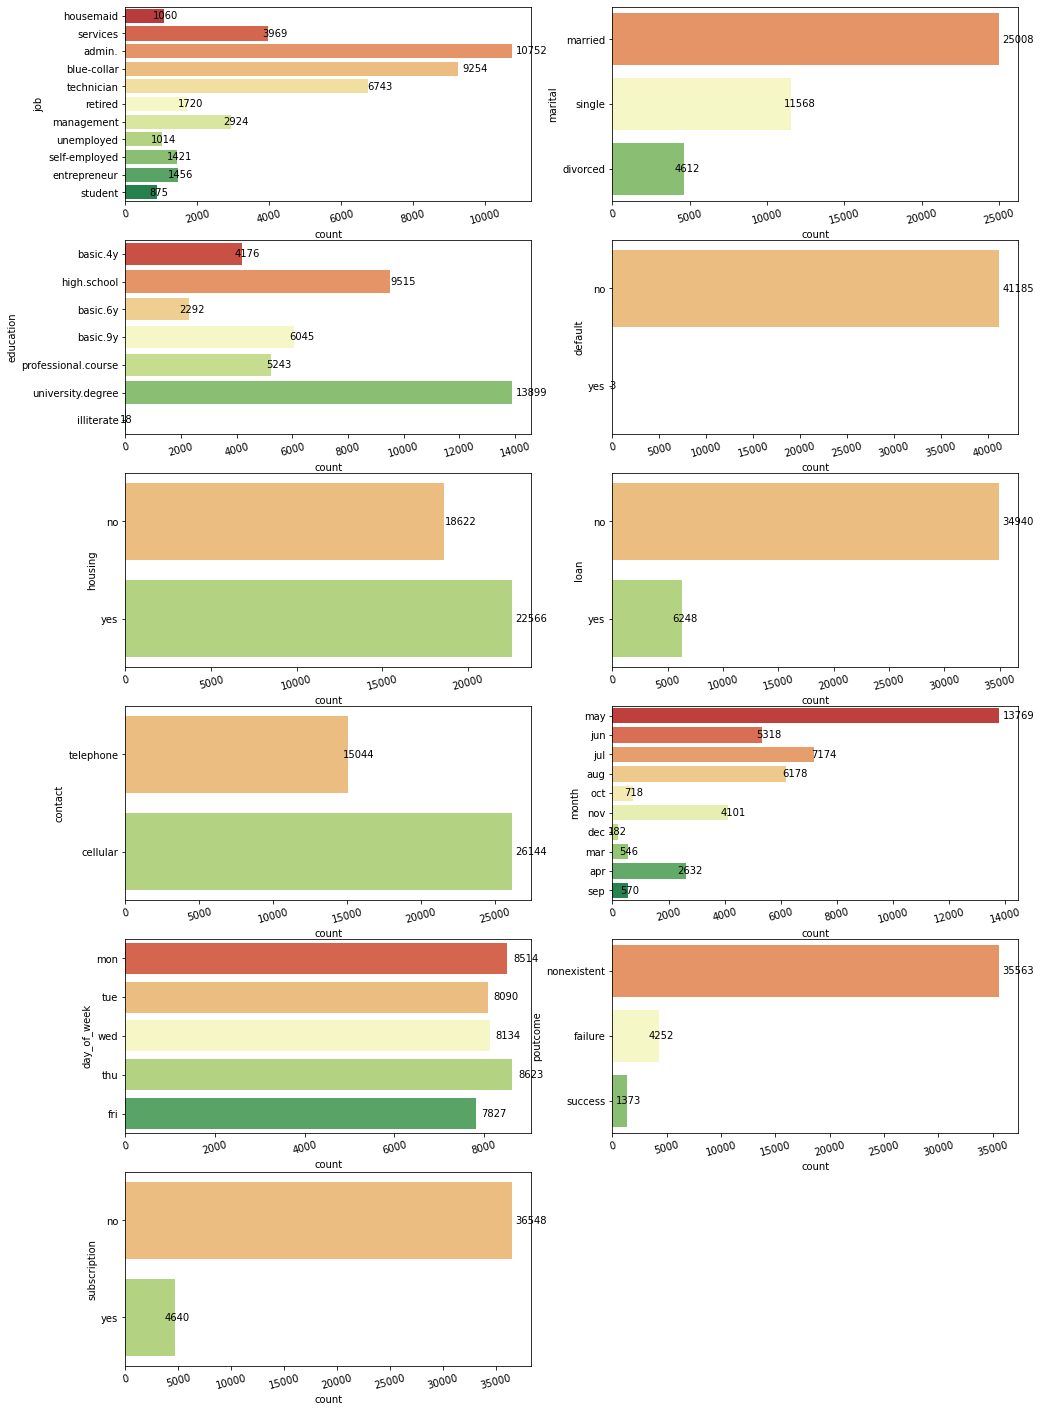

In [23]:
categorical_analysis(data.select_dtypes(include='object').columns,data)

#### Observation
* All the tables are containing null value less than 50% .Hence we have to impute those columns with mean and mode for numerical and categorical data respectively.

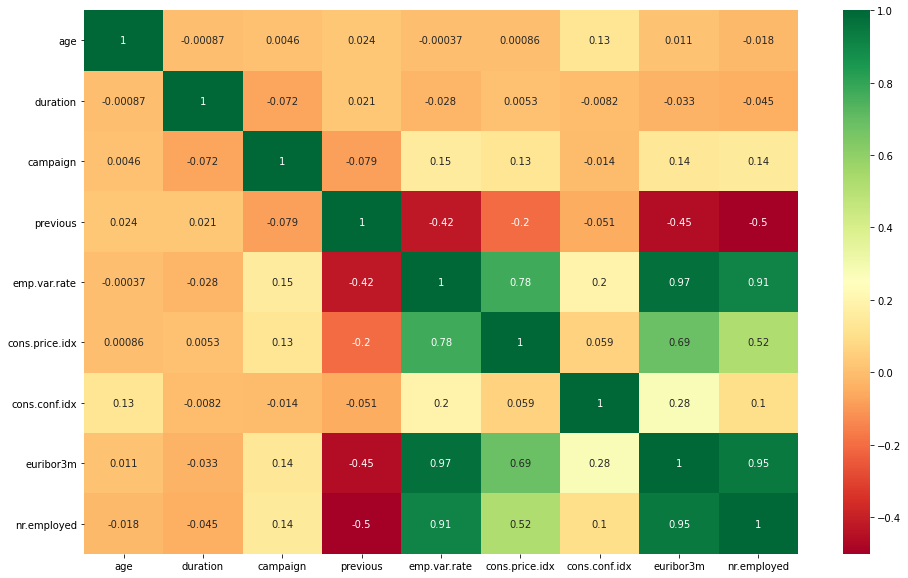

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [25]:
def categorical_analysis_box(cat_var,tar_var,data):
    plt.figure(figsize=(16, 30))
    for i in range(0,len(cat_var)):
        sns.set_style("whitegrid")
        plt.subplot(6,2,i+1)
        sns.boxplot(x = cat_var[i], y = tar_var, data = data)
        plt.xticks(rotation=45)
    plt.show()

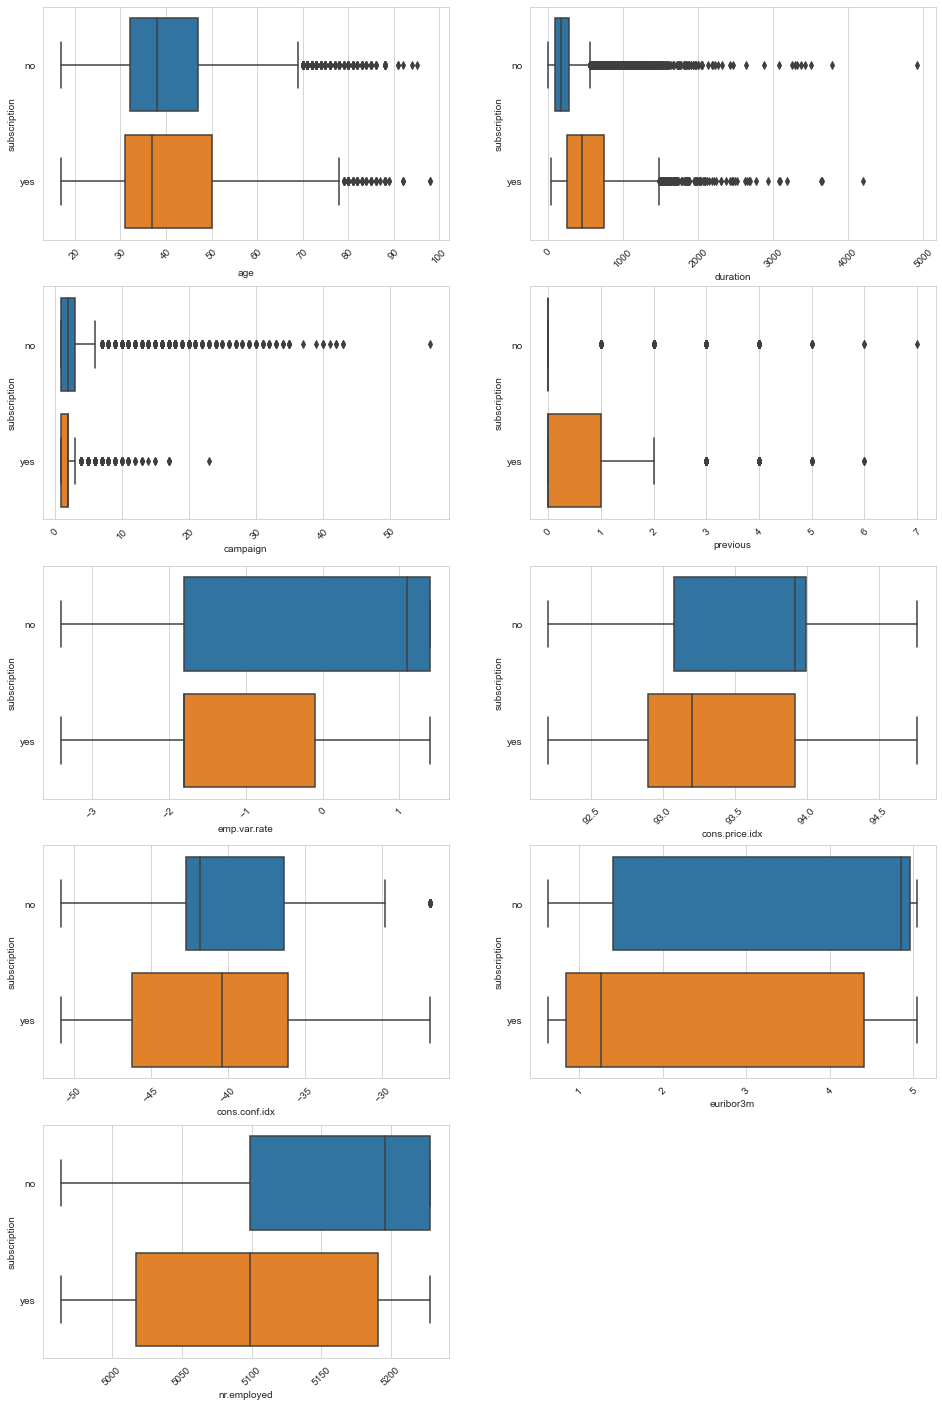

In [26]:
categorical_analysis_box(data.select_dtypes(include='number').columns,'subscription',data)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [28]:
# Excluding values outside 99th percentile in 'TotalVisits' & 'Page Views Per Visit' variables
data=data[data['age']<np.nanpercentile(data['age'], 99)]
data=data[data['duration']<np.nanpercentile(data['duration'], 99)]
data=data[data['cons.conf.idx']<np.nanpercentile(data['cons.conf.idx'], 99)]

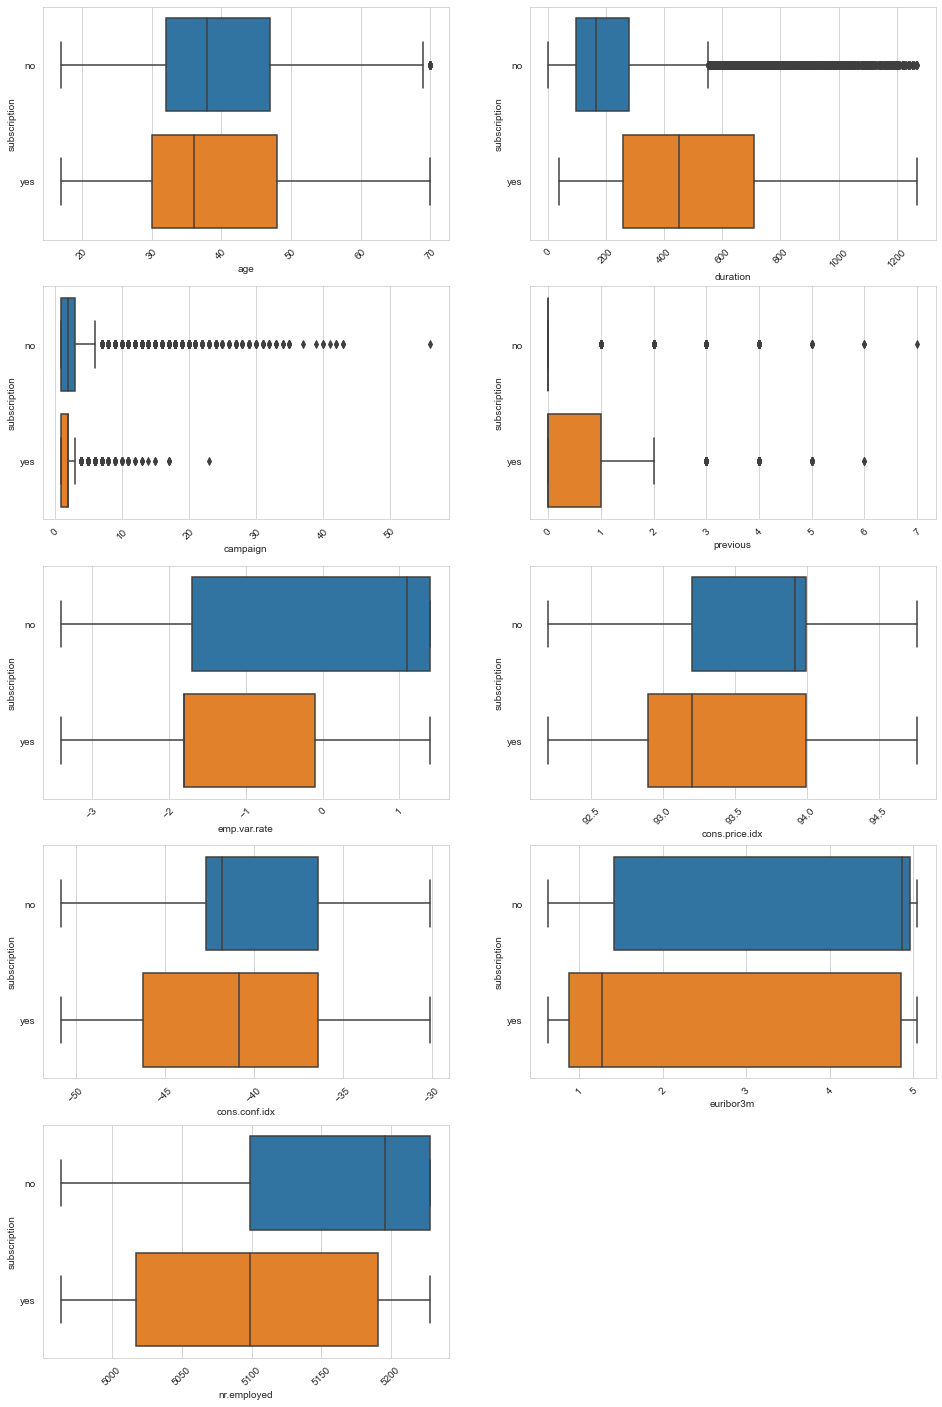

In [29]:
categorical_analysis_box(data.select_dtypes(include='number').columns,'subscription',data)

## Step 4: Data Preparation

In [30]:
data = data.replace(to_replace = "yes", value = 1)
data = data.replace(to_replace = "no", value = 0)

In [31]:
# Defining the map function
def dummies(cols,data):
    for x in cols:
        t = pd.get_dummies(data[x], drop_first = True,prefix=x)
        data = pd.concat([data, t], axis = 1)
        data.drop([x], axis = 1, inplace = True)
    return data
# Applying the function to the bike_data
data=dummies(data.select_dtypes(include='object').columns,data)


In [33]:
y=data['subscription']

In [34]:
X= data.drop('subscription',axis=1)

### Splitting the Data into Training and Testing Sets

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [36]:
print('X_train :',X_train.shape,' y_train :',y_train.shape)
print('X_test :',X_test.shape, ' y_test :',y_test.shape)

X_train : (27807, 46)  y_train : (27807,)
X_test : (11918, 46)  y_test : (11918,)


### Rescaling the Features

In [37]:
scaler=StandardScaler()
cols=X_train.select_dtypes(include='number').columns
X_train[cols]=scaler.fit_transform(X_train[cols])

In [38]:
X_train .describe()

,age,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04,2.780700e+04
mean,1.124417e-17,2.280047e-15,-3.962259e-16,-1.200120e-15,3.343605e-17,8.217665e-16,7.760981e-16,5.160918e-16,2.522740e-15,1.264489e-15,-5.445112e-17,5.744397e-15,5.963591e-16,1.001808e-15,-3.382673e-16,-5.436807e-16,-1.027492e-15,1.499683e-15,-1.087170e-15,1.129643e-15,1.801183e-16,-3.927284e-16,-3.753925e-16,-5.902025e-16,1.638971e-15,1.717745e-15,-1.741525e-15,1.709827e-16,-3.005911e-16,7.347746e-16,-5.575270e-17,-9.576058e-16,-3.961455e-16,4.025821e-16,8.871763e-16,1.645735e-15,-9.669046e-16,1.775179e-15,4.274510e-16,1.082727e-15,1.574024e-15,-2.775570e-15,-1.752701e-15,6.503471e-16,-1.946805e-15,-1.492754e-16
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-2.339160e+00,-5.996954e-03,-1.098672e+00,-4.226846e-01,-1.139021e+00,-5.630340e-01,-3.379754e-01,-2.375868e+00,-2.500946e+00,-2.328901e+00,-1.810556e+00,-3.010540e+00,-5.478890e-01,-1.931416e-01,-1.601075e-01,-2.776346e-01,-1.814142e-01,-1.906232e-01,-3.290747e-01,-1.458248e-01,-4.484578e-01,-1.561651e-01,-1.240373e+00,-6.277294e-01,-2.448680e-01,-4.180648e-01,-5.497196e-01,-1.896710e-02,-3.837909e-01,-7.142710e-01,-7.720063e-01,-4.238659e-01,-6.185933e-02,-4.649067e-01,-3.880961e-01,-1.122483e-01,-7.254982e-01,-3.360108e-01,-7.866118e-02,-8.250399e-02,-5.109122e-01,-5.151626e-01,-4.897286e-01,-5.003146e-01,-2.600157e+00,-1.740938e-01
25%,-7.799157e-01,-5.996954e-03,-1.098672e+00,-4.226846e-01,-6.671650e-01,-5.630340e-01,-3.379754e-01,-1.310039e+00,-9.377337e-01,-4.536609e-01,-1.362815e+00,-1.043588e+00,-5.478890e-01,-1.931416e-01,-1.601075e-01,-2.776346e-01,-1.814142e-01,-1.906232e-01,-3.290747e-01,-1.458248e-01,-4.484578e-01,-1.561651e-01,-1.240373e+00,-6.277294e-01,-2.448680e-01,-4.180648e-01,-5.497196e-01,-1.896710e-02,-3.837909e-01,-7.142710e-01,-7.720063e-01,-4.238659e-01,-6.185933e-02,-4.649067e-01,-3.880961e-01,-1.122483e-01,-7.254982e-01,-3.360108e-01,-7.866118e-02,-8.250399e-02,-5.109122e-01,-5.151626e-01,-4.897286e-01,-5.003146e-01,3.845922e-01,-1.740938e-01
50%,-1.562179e-01,-5.996954e-03,9.101898e-01,-4.226846e-01,-3.121052e-01,-2.079195e-01,-3.379754e-01,6.217768e-01,5.700332e-01,-2.453009e-01,6.839143e-01,2.904558e-01,-5.478890e-01,-1.931416e-01,-1.601075e-01,-2.776346e-01,-1.814142

## Step 5: Building the model

In [39]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           subscription   No. Observations:                27807
Model:                            GLM   Df Residuals:                    27760
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4986.2
Date:                Mon, 14 Jun 2021   Deviance:                       9972.4
Time:                        14:39:51   Pearson chi2:                 1.80e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.5330      0.639     -5.527      0.000      -4.786      -2.280
age                              -0.0202      0.032     -0.635      0.525      -0.082       0.042
default                          -0.0964    106.324     -0.001      0.999    -208.488     208.296
housing                           0.0142      0.027      0.529      0.597      -0.038       0.067
loan                              0.0196      0.027      0.740      0.459      -0.032       0.072
duration                          1.2627      0.023     53.846      0.000       1.217       1.309
campaign                         -0.1311      0.043     -3.031      0.002      -0.216      -0.046
previous                          0.0001      0.035      0.004      0.997      -0.068       0.068
emp.var.rate                     -2.9106      0.275    -10.573      0.000      -3.450      -2.371
cons.price.idx                    1.1161      0.179      6.250      0.000       0.766       1.466
cons.conf.idx                     0.1055      0.047      2.243      0.025       0.013       0.198
euribor3m                         0.9442      0.290      3.254      0.001       0.375       1.513
nr.employed                       0.1975      0.272      0.727      0.468      -0.335       0.730
job_blue-collar                  -0.1190      0.043     -2.792      0.005      -0.203      -0.035
job_entrepreneur                 -0.0468      0.031     -1.513      0.130      -0.107       0.014
job_housemaid                    -0.0299      0.033     -0.912      0.362      -0.094       0.034
job_management                   -0.0218      0.029     -0.760      0.447      -0.078       0.034
job_retired                       0.0150      0.027      0.555      0.579      -0.038       0.068
job_self-employed                -0.0311      0.028     -1.116      0.264      -0.086       0.024
job_services                     -0.0565      0.032     -1.741      0.082      -0.120       0.007
job_student                       0.0164      0.020      0.835      0.404      -0.022       0.055
job_technician                   -0.0114      0.034     -0.338      0.736      -0.078       0.055
job_unemployed                    0.0156      0.025      0.615      0.539      -0.034       0.065
marital_married                  -0.0075      0.045     -0.166      0.868      -0.096       0.081
marital_single                    0.0159      0.047      0.340      0.734      -0.076       0.107
education_basic.6y                0.0543      0.038      1.444      0.149      -0.019       0.128
education_basic.9y                0.0586      0.046      1.263      0.206      -0.032       0.150
education_high.school             0.0986      0.054      1.820      0.069      -0.008       0.205
education_illiterate             -0.0019     

In [40]:
#### Running RFE with the output number of the variable equal to 18
logreg = LogisticRegression()
rfe = RFE(logreg, 15)          
rfe = rfe.fit(X_train, y_train)

In [41]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [42]:
def build_model(X,y):
    X = sm.add_constant(X)
    logm2 = sm.GLM(y,X, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())
    return X

def checkVIF(dataset):
    col=['const']
    dataset = dataset.drop([x for x in col if x in dataset.columns], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [43]:
X_train_model = build_model(X_train_rfe,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           subscription   No. Observations:                27807
Model:                            GLM   Df Residuals:                    27791
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5025.9
Date:                Mon, 14 Jun 2021   Deviance:                       10052.
Time:                        14:39:59   Pearson chi2:                 1.81e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.5074 

In [44]:
checkVIF(X_train_model)

,Features,VIF
2,emp.var.rate,130.64
5,euribor3m,94.14
3,cons.price.idx,15.50
8,month_aug,5.31
4,cons.conf.idx,3.69
7,contact_telephone,3.19
9,month_jun,2.52
11,month_may,2.52
12,month_nov,2.09
13,poutcome_nonexistent,1.57


In [45]:
X_train_model = X_train_model.drop(["emp.var.rate"], axis = 1)

In [46]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           subscription   No. Observations:                27807
Model:                            GLM   Df Residuals:                    27792
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5117.6
Date:                Mon, 14 Jun 2021   Deviance:                       10235.
Time:                        14:40:00   Pearson chi2:                 1.90e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.4775 

In [47]:
checkVIF(X_train_model)

,Features,VIF
2,cons.price.idx,4.41
4,euribor3m,3.77
6,contact_telephone,3.01
7,month_aug,2.85
10,month_may,2.34
3,cons.conf.idx,2.31
8,month_jun,1.90
11,month_nov,1.69
12,poutcome_nonexistent,1.57
13,poutcome_success,1.43


In [48]:
X_train_model = X_train_model.drop(["month_aug"], axis = 1)

In [49]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           subscription   No. Observations:                27807
Model:                            GLM   Df Residuals:                    27793
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5118.1
Date:                Mon, 14 Jun 2021   Deviance:                       10236.
Time:                        14:40:00   Pearson chi2:                 1.90e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.4753 

In [50]:
checkVIF(X_train_model)

,Features,VIF
2,cons.price.idx,3.65
4,euribor3m,3.47
6,contact_telephone,2.86
9,month_may,2.04
7,month_jun,1.90
11,poutcome_nonexistent,1.57
3,cons.conf.idx,1.52
12,poutcome_success,1.43
10,month_nov,1.29
8,month_mar,1.07


In [51]:
X_train_model = X_train_model.drop(["month_nov"], axis = 1)

In [52]:
X_train_model = build_model(X_train_model,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           subscription   No. Observations:                27807
Model:                            GLM   Df Residuals:                    27794
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5119.6
Date:                Mon, 14 Jun 2021   Deviance:                       10239.
Time:                        14:40:01   Pearson chi2:                 1.89e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.4734 

In [53]:
checkVIF(X_train_model)

,Features,VIF
2,cons.price.idx,3.27
4,euribor3m,3.27
6,contact_telephone,2.78
7,month_jun,1.88
9,month_may,1.88
10,poutcome_nonexistent,1.54
3,cons.conf.idx,1.49
11,poutcome_success,1.43
8,month_mar,1.06
5,job_blue-collar,1.04


### All variables now are within acceptable range in terms of p-value and VIF. So we go ahead and make our predictions using this model only.

## Step 6: Making Predictions Using the Final Model

In [57]:
logm2 = sm.GLM(y_train,X_train_model, family = sm.families.Binomial())
res = logm2.fit()

### Creating Predict on training dataset

In [59]:
y_train_pred = res.predict(sm.add_constant(X_train_model))
y_train_pred[:10]

27047    0.361340
29548    0.038006
5790     0.003839
8216     0.008584
33367    0.011225
30136    0.330796
32432    0.016383
17269    0.017887
29100    0.054684
31441    0.022475
dtype: float64

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.36134008, 0.03800597, 0.00383863, 0.00858389, 0.01122528,
       0.33079581, 0.01638265, 0.01788732, 0.05468419, 0.02247529])

In [61]:
y_train_pred_final = pd.DataFrame({'Subscription':y_train.values, 'Subscription_Prob':y_train_pred})

### Creating 'predicted' column based on 'Converted_Prob' value >0.5

In [62]:
y_train_pred_final['predicted'] = y_train_pred_final['Subscription_Prob'].map(lambda x: 1 if x > 0.5 else 0)

In [63]:
y_train_pred_final

,Subscription,Subscription_Prob,predicted
0,1,0.361340,0
1,0,0.038006,0
2,0,0.003839,0
3,0,0.008584,0
4,0,0.011225,0
...,...,...,...
27802,0,0.001696,0
27803,0,0.005395,0
27804,0,0.011467,0
27805,1,0.676371,1


In [64]:
def confusionMatrix(x,y):  
    matrixName=metrics.confusion_matrix(x,y)
    print(matrixName)
    print()
    TP = matrixName[1,1] # true positive 
    TN = matrixName[0,0] # true negatives
    FP = matrixName[0,1] # false positives
    FN = matrixName[1,0] # false negatives
    matrix={"TP": TP,"TN":TN,"FP":FP,"FN":FN}
    print()
    print(matrix)
    print("Sensitivity is : ",round(TP / float(TP+FN),3))
    print("Specificity is : ",round(TN / float(TN+FP),3))
    print("False Postive Rate is :",round(FP/ float(TN+FP),3))
    print("Positive predictive value is : ",round(TP / float(TP+FP),3))
    print("Negative predictive value is : ",round(TN / float(TN+ FN),3))
    print("Accuracy Score is : ",round(metrics.accuracy_score(x,y),3))
    print("Precision Score is : ",round(precision_score(x,y),3))
    print("Recall Value is : ",round(recall_score(x,y),3))    

### Creating confusion matrix and related values using the y_train_pred_final

In [65]:
confusionMatrix(y_train_pred_final['Subscription'], y_train_pred_final['predicted'])

[[24490   611]
 [ 1581  1125]]


{'TP': 1125, 'TN': 24490, 'FP': 611, 'FN': 1581}
Sensitivity is :  0.416
Specificity is :  0.976
False Postive Rate is : 0.024
Positive predictive value is :  0.648
Negative predictive value is :  0.939
Accuracy Score is :  0.921
Precision Score is :  0.648
Recall Value is :  0.416


### Drawing ROC curve for the Training Dataset

In [66]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return None

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Subscription'], y_train_pred_final['Subscription_Prob'], drop_intermediate = False )

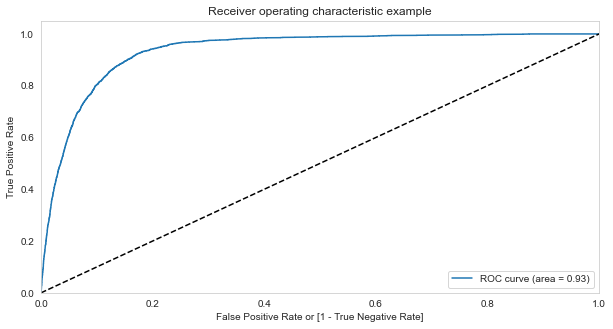

In [68]:
draw_roc(y_train_pred_final['Subscription'],y_train_pred_final['Subscription_Prob'])

### Creating columns with different probability cutoffs 

In [70]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Subscription_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Subscription,Subscription_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.361340,0,1,1,1,1,0,0,0,0,0,0
1,0,0.038006,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003839,0,1,0,0,0,0,0,0,0,0,0
3,0,0.008584,0,1,0,0,0,0,0,0,0,0,0
4,0,0.011225,0,1,0,0,0,0,0,0,0,0,0


### Calculate accuracy sensitivity & specificity for various probability cutoffs

In [71]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Subscription'], y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.097314  1.000000  0.000000
0.1   0.1  0.858705  0.886548  0.855703
0.2   0.2  0.905851  0.732077  0.924585
0.3   0.3  0.917431  0.601996  0.951436
0.4   0.4  0.919768  0.497044  0.965340
0.5   0.5  0.921171  0.415743  0.975658
0.6   0.6  0.919085  0.327421  0.982869
0.7   0.7  0.915813  0.236881  0.989004
0.8   0.8  0.912072  0.155580  0.993626
0.9   0.9  0.907254  0.071693  0.997331


### Plot accuracy,sensitivity & specificity for various probabilities

<Figure size 720x360 with 0 Axes>

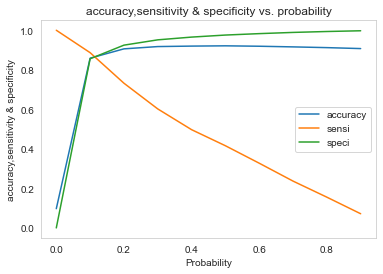

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(10, 5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title('accuracy,sensitivity & specificity vs. probability')
plt.xlabel('Probability')
plt.ylabel('accuracy,sensitivity & specificity')
plt.legend()
plt.grid()
plt.show()

### Creating 'predicted' column based on 'Converted_Prob' value >0.25

In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Subscription_Prob'].map( lambda x: 1 if x > 0.15 else 0)
y_train_pred_final.head()

,Subscription,Subscription_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.361340,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.038006,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003839,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.008584,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.011225,0,1,0,0,0,0,0,0,0,0,0,0


### Creating confusion matrix and related values using y_train_pred_final

In [75]:
confusionMatrix(y_train_pred_final['Subscription'], y_train_pred_final['final_predicted'])

[[22572  2529]
 [  527  2179]]


{'TP': 2179, 'TN': 22572, 'FP': 2529, 'FN': 527}
Sensitivity is :  0.805
Specificity is :  0.899
False Postive Rate is : 0.101
Positive predictive value is :  0.463
Negative predictive value is :  0.977
Accuracy Score is :  0.89
Precision Score is :  0.463
Recall Value is :  0.805


In [79]:
y_train_pred_final['Subscription'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Subscription'], y_train_pred_final['Subscription_Prob'])

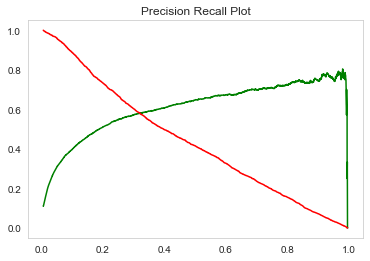

In [81]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision Recall Plot")
plt.grid()
plt.show()

## Step 7: Model Evaluation    

In [82]:
cols=X_train.select_dtypes(include='number').columns
X_test[cols]=scaler.fit_transform(X_test[cols])

In [83]:
final_col=X_train_model.drop('const',axis=1)

In [84]:
X_test=X_test[final_col.columns]

In [85]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

10343    0.004420
22749    0.014196
14989    0.029889
16962    0.008422
17772    0.011658
12235    0.008335
10714    0.009442
11211    0.026483
26157    0.023828
32912    0.064804
dtype: float64

In [86]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [87]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [88]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Subscription_Prob'})

NameError: name 'y_test_pred_final' is not defined

In [91]:
y_test_pred_final.head()

,subscription,Converted_prob
0,0,0.004420
1,0,0.014196
2,0,0.029889
3,0,0.008422
4,0,0.011658


In [93]:
y_test_pred_final['Converted_Score'] = y_test_pred_final.Subscription_Prob.map( lambda x: round(x*100))

In [94]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Subscription_Prob.map(lambda x: 1 if x > 0.15 else 0)

### Creating Confusion matrix for the test Data

In [96]:
confusionMatrix(y_test_pred_final['subscription'], y_test_pred_final['final_Predicted'])

[[9636 1062]
 [ 243  977]]


{'TP': 977, 'TN': 9636, 'FP': 1062, 'FN': 243}
Sensitivity is :  0.801
Specificity is :  0.901
False Postive Rate is : 0.099
Positive predictive value is :  0.479
Negative predictive value is :  0.975
Accuracy Score is :  0.891
Precision Score is :  0.479
Recall Value is :  0.801


# Recommendation

#### Top features which are recommended by model as factor :
    duration
    cons.price.idx
    cons.conf.idx
    month_mar
    month_Jun
    poutcome_success
    poutcome_nonexistent
    
#### Features which are indicatorsfor not subscription:
    campaign
    euribor3m
    job_blue-collar
    contact_telephone
    month_may


# Insights

1.) Leads whose origin is either poutcome_success or poutcome_nonexistent are good for subscription.
    Marketting spends can be increased on these 2 types of origins to increase revenues for the company as these are more likely to subscribe the banking notification.
   
2.)  Sales professionals should not invest way too much time on people from job group as 'blue-collar" as they are most unlikely to subscribe 
